## County Data and Small Businesses Growth

This track intends to test the following hypotheses:

1. Small businesses in counties with high urban population are more affected by the economic fluctuations
2. Economic crisis had a stronger effect on average county salary with more small and medium busineses present
3. The effect of growing Fortune 500 companies is rather drastic (negative in regards to small and medium businesses) 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
county_data = pd.read_csv('county_data_final.csv')

In [15]:
county_group_year = county_data.groupby('year').mean()

Text(0.5,0,'Average National Unemployment')

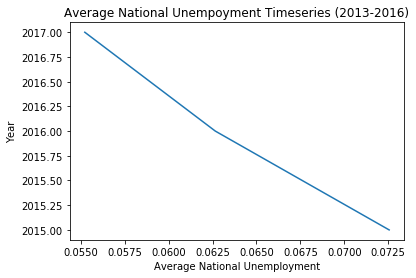

In [25]:
# What happened to average employment for the last 5 years?
plt.plot(county_group_year['unemployment'], county_group_year.index)
plt.title("Average National Unempoyment Timeseries (2013-2016)")
plt.ylabel("Year")
plt.xlabel("Average National Unemployment")

Text(0.5,0,'Average National Income')

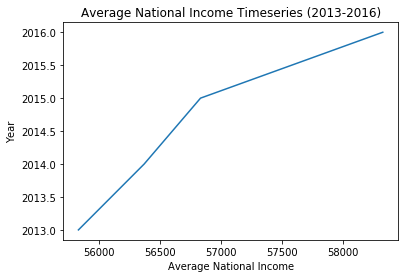

In [24]:
# What income on a National Level?
plt.plot(county_group_year['income'], county_group_year.index)
plt.title("Average National Income Timeseries (2013-2016)")
plt.ylabel("Year")
plt.xlabel("Average National Income")

In [ ]:
# The story looks positive, but is it the case across all of the US? 
# Let's now tak a closer look at different parts of the US

In [26]:
# So how does it tie with Small and Medium Business Growth? Let's compare the numbers.